In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Throughput Analysis

In [2]:
# counted with tokei
locs = {
    'CryptoBets': 1142,
    'IMBTC': 664,
    'SpankchainLedgerChannel': 1048,
    'multi10': 150,
    'crowdsale': 41,
    'PackSale': 730
}

In [3]:
# results of some of the tools run on the throughput contracts
tools = pd.read_csv("./tools-throughput.summary.csv")

In [4]:
tools

,tool,contract,run,throughput,metric,runtime
0,confuzzius,multi10,7,94.000000,tx / sec,1805.0
1,confuzzius,SpankchainLedgerChannel,6,72.000000,tx / sec,1801.0
2,confuzzius,crowdsale,6,102.000000,tx / sec,1801.0
3,confuzzius,IMBTC,5,45.000000,tx / sec,1814.0
4,confuzzius,SpankchainLedgerChannel,4,68.000000,tx / sec,1801.0
...,...,...,...,...,...,...
75,echidna,multi10,5,206.078845,testcase / sec,1801.0
76,echidna,SpankchainLedgerChannel,5,21.640841,testcase / sec,1807.0
77,echidna,IMBTC,1,51.050857,testcase / sec,1809.0
78,echidna,multi10,6,218.476402,testcase / sec,1801.0


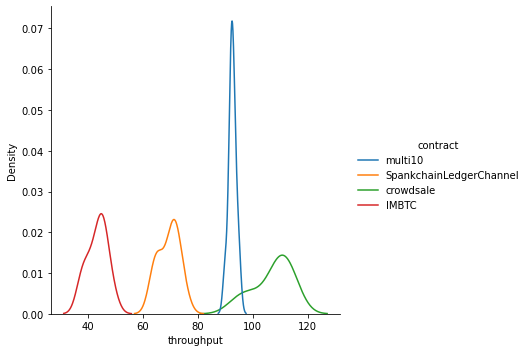

In [5]:
sns.displot(data=tools[tools['tool'] == 'confuzzius'], x='throughput', hue='contract', kind='kde')

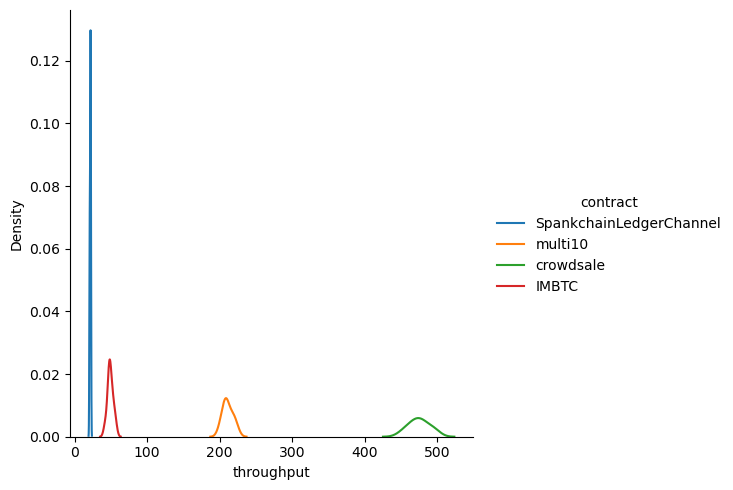

In [6]:
sns.displot(data=tools[tools['tool'] == 'echidna'], x='throughput', hue='contract', kind='kde')

In [7]:
for tool in set(tools['tool']):
    print("#", tool)
    for contract in set(tools['contract']):
        print("## ", contract)
        print(tools[(tools['contract'] == contract) & (tools['tool'] == tool)].throughput.describe())

# confuzzius
##  IMBTC
count    10.000000
mean     43.400000
std       3.596294
min      38.000000
25%      41.250000
50%      44.500000
75%      45.750000
max      49.000000
Name: throughput, dtype: float64
##  SpankchainLedgerChannel
count    10.000000
mean     69.400000
std       3.717825
min      64.000000
25%      65.750000
50%      70.500000
75%      72.000000
max      75.000000
Name: throughput, dtype: float64
##  crowdsale
count     10.000000
mean     107.200000
std        6.908931
min       94.000000
25%      103.750000
50%      109.000000
75%      112.250000
max      114.000000
Name: throughput, dtype: float64
##  multi10
count    10.000000
mean     92.600000
std       1.349897
min      90.000000
25%      92.000000
50%      92.500000
75%      93.000000
max      95.000000
Name: throughput, dtype: float64
# echidna
##  IMBTC
count    10.000000
mean     49.152936
std       3.850024
min      42.261351
25%      47.364819
50%      47.948646
75%      50.981695
max      56.091916
Nam

In [8]:
tools[tools['tool'] == "echidna"]['throughput'].describe()

count     40.000000
mean     189.334261
std      182.843503
min       20.317654
25%       37.282435
50%      128.301649
75%      280.811771
max      497.330372
Name: throughput, dtype: float64

In [9]:
tools[tools['tool'] == "confuzzius"]['throughput'].describe()

count     40.000000
mean      78.150000
std       24.835407
min       38.000000
25%       60.250000
50%       82.500000
75%       94.250000
max      114.000000
Name: throughput, dtype: float64

In [10]:
efcf = pd.read_csv("./fuzz-throughput.csv")
efcf

,contract,mode,status,evm-coverage,bugtypes,total_time,crashes -,hardcoded address,wall clock time (h:)m:ss,time,total_hangs,queue - Number of unique TX sequences,total_crashes,average_execs_per_sec,bugs,total_execs_done,cumulative_execs_per_sec,log
0,CryptoBets,mode-2AT,success,38.629738,1,600,0,17,10:15.31,600,5,209,0,3220,NaN,1932341,3220,<NO LOG>
1,CryptoBets,mode-2AT,success,40.670554,1,600,0,17,10:19.69,600,6,258,0,17514,NaN,10508866,17514,<NO LOG>
2,CryptoBets,mode-2AT,success,40.962099,1,600,0,17,10:20.42,600,3,304,0,19318,NaN,11591200,19318,<NO LOG>
3,CryptoBets,mode-2AT,success,39.504373,1,600,0,17,10:15.75,600,5,293,0,18251,NaN,10950945,18251,<NO LOG>
4,CryptoBets,mode-2AT,success,41.107872,1,600,0,17,10:23.08,600,4,221,0,9866,NaN,5919872,9866,<NO LOG>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,multi10,mode-monly,success,87.567568,1,600,0,1,10:08.93,600,0,165,0,22432,NaN,13459693,22432,<NO LOG>
476,multi10,mode-monly,success,83.783784,1,600,0,1,10:09.00,600,0,169,0,18799,NaN,11279657,18799,<NO LOG>
477,multi10,mode-monly,success,60.000000,1,600,0,1,10:08.47,600,0,155,0,20203,NaN,12121950,20203,<NO LOG>
478,multi10,mode-monly,success,87.567568,1,600,0,1,10:10.04,600,0,216,0,18932,NaN,11359475,18932,<NO LOG>


In [11]:
efcf[efcf['mode'] == 'mode-2AT']['cumulative_execs_per_sec'].describe()

count      120.000000
mean     24300.558333
std       7153.774910
min       2245.000000
25%      22769.250000
50%      25013.000000
75%      26952.000000
max      36147.000000
Name: cumulative_execs_per_sec, dtype: float64

In [12]:
efcf[(efcf['contract'] == 'SpankchainLedgerChannel') & (efcf['mode'] == 'mode-aonly')]

,contract,mode,status,evm-coverage,bugtypes,total_time,crashes -,hardcoded address,wall clock time (h:)m:ss,time,total_hangs,queue - Number of unique TX sequences,total_crashes,average_execs_per_sec,bugs,total_execs_done,cumulative_execs_per_sec,log
260,SpankchainLedgerChannel,mode-aonly,success,50.906096,1,600,0,1,10:12.07,600,0,52,0,26151,NaN,15691078,26151,<NO LOG>
261,SpankchainLedgerChannel,mode-aonly,success,43.822076,1,600,0,1,10:12.01,600,0,76,0,27494,NaN,16496573,27494,<NO LOG>
262,SpankchainLedgerChannel,mode-aonly,success,45.140033,1,600,0,1,10:11.35,600,0,66,0,14910,NaN,8946273,14910,<NO LOG>
263,SpankchainLedgerChannel,mode-aonly,success,48.764415,1,600,0,1,10:11.88,600,0,60,0,22983,NaN,13790111,22983,<NO LOG>
264,SpankchainLedgerChannel,mode-aonly,success,51.070840,1,600,0,1,10:11.80,600,0,64,0,22599,NaN,13559971,22599,<NO LOG>
265,SpankchainLedgerChannel,mode-aonly,success,50.906096,1,600,0,1,10:11.65,600,0,62,0,25891,NaN,15534809,25891,<NO LOG>
266,SpankchainLedgerChannel,mode-aonly,success,48.764415,1,600,0,1,10:10.09,600,0,46,0,21077,NaN,12646226,21077,<NO LOG>
267,SpankchainLedgerChannel,mode-aonly,success,45.634267,1,600,0,1,10:11.66,600,0,52,0,16221,NaN,9732856,16221,<NO LOG>
268,SpankchainLedgerChannel,mode-aonly,success,49.917628,1,600,0,1,10:10.43,600,0,76,0,12322,NaN,7393284,12322,<NO LOG>
269,SpankchainLedgerChannel,mode-aonly,success,50.906096,1,600,0,1,10:10.82,600,0,50,0,22175,NaN,13305447,22175,<NO LOG>


In [13]:
efcf['status'].value_counts()

success    480
Name: status, dtype: int64

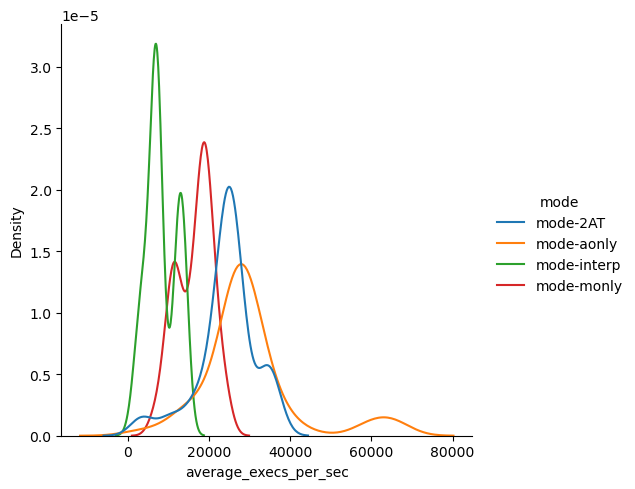

In [14]:
sns.displot(data=efcf, x='average_execs_per_sec', hue='mode', kind='kde')

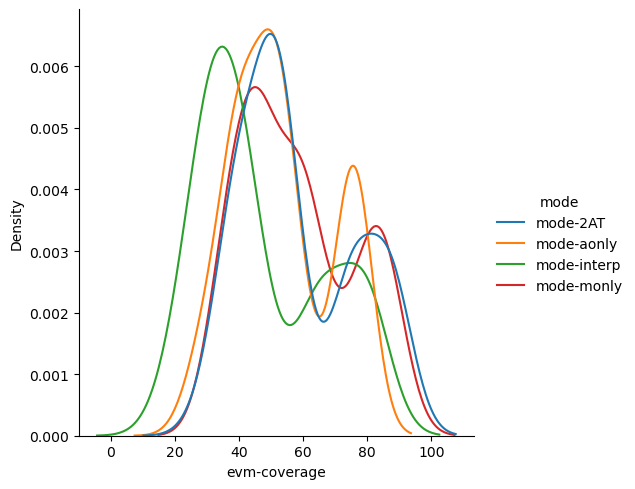

In [15]:
sns.displot(data=efcf, x='evm-coverage', hue='mode', kind='kde')

In [16]:
df = list()
for mode in set(efcf['mode']):
#     print("#", mode)
    for contract in set(efcf['contract']):
#         print("# ", contract)
        x = efcf[(efcf['contract'] == contract) & (efcf['mode'] == mode)]
#         x.average_execs_per_sec.describe().T
#         x['evm-coverage'].describe().T
        d = pd.concat([x.average_execs_per_sec.describe().drop(['count']).rename(lambda s: "throughput_" + s), 
                       x['evm-coverage'].describe().drop(['count']).rename(lambda s: "coverage_" + s)]).T
        d['mode'] = str(mode).replace("mode-", "")
        d['contract'] = contract
        df.append(d)
throughput = pd.DataFrame(df)
#throughput = df.set_index(['contract', 'mode'])
#throughput.sort_index(level=1)
throughput

,throughput_mean,throughput_std,throughput_min,throughput_25%,throughput_50%,throughput_75%,throughput_max,coverage_mean,coverage_std,coverage_min,coverage_25%,coverage_50%,coverage_75%,coverage_max,mode,contract
0,17245.75,1472.240930,13333.0,16391.75,17464.0,18281.50,19360.0,50.518946,5.052750e+00,42.998353,45.469522,51.153213,53.294893,60.790774,monly,SpankchainLedgerChannel
1,18444.65,2669.095259,14214.0,16671.00,18320.5,19782.00,24449.0,36.447368,1.437577e+00,34.561404,35.570175,35.789474,37.675439,39.473684,monly,IMBTC
2,20641.30,1744.053418,18145.0,19187.50,20116.5,21802.25,24628.0,75.729730,1.355147e+01,48.648649,65.945946,83.783784,87.567568,87.567568,monly,multi10
3,11952.30,1775.768391,8519.0,11002.75,11539.0,12727.25,16058.0,60.179283,6.262782e-01,59.760956,59.760956,59.760956,60.258964,61.752988,monly,PackSale
4,10256.20,1993.934291,6063.0,9156.25,10888.5,11395.75,13656.0,45.043732,1.458003e-14,45.043732,45.043732,45.043732,45.043732,45.043732,monly,CryptoBets
5,19868.70,2196.947574,15483.0,18831.75,19673.5,21005.00,24780.0,80.633803,3.535921e+00,74.647887,77.112676,81.690141,83.098592,84.507042,monly,crowdsale
6,19837.30,7401.476347,2005.0,15959.75,22387.0,25007.50,28476.0,46.985173,6.240322e+00,25.041186,45.634267,48.764415,50.906096,51.070840,aonly,SpankchainLedgerChannel
7,28372.10,4106.881182,26395.0,26746.25,27008.5,27452.75,40644.0,52.552632,7.232959e-01,50.877193,52.236842,52.982456,52.982456,52.982456,aonly,IMBTC
8,43053.80,17691.996655,26222.0,26997.75,33816.0,62696.75,66436.0,40.810811,2.879028e+00,38.918919,38.918919,38.918919,42.162162,45.945946,aonly,multi10
9,32215.20,9182.301223,27893.0,28744.25,29567.5,30042.50,59277.0,67.509960,8.416287e+00,57.768924,58.565737,73.705179,75.298805,75.298805,aonly,PackSale


In [17]:
q = throughput[(throughput['contract'] == 'SpankchainLedgerChannel') & (throughput['mode'] == '2AT')]
q

,throughput_mean,throughput_std,throughput_min,throughput_25%,throughput_50%,throughput_75%,throughput_max,coverage_mean,coverage_std,coverage_min,coverage_25%,coverage_50%,coverage_75%,coverage_max,mode,contract
18,22698.15,1928.91541,18139.0,22408.75,22973.5,23710.0,25730.0,41.688633,7.471851,30.477759,37.026359,40.280066,48.228995,56.01318,2AT,SpankchainLedgerChannel


In [18]:
# Generate the latex table for the paper

print(r"""
\begin{tabular}{lr|cccc cccc}
    \toprule
    Contract    & LOC  & \multicolumn{2}{c}{Interp} & \multicolumn{2}{c}{AFL} & \multicolumn{2}{c}{EM} & \multicolumn{2}{c}{Full} \\
    \midrule
""")
contracts = set(throughput['contract'])
modes = ['interp', 'aonly', 'monly', '2AT']
for contract in contracts:
    x = []
    for mode in modes:
        q = throughput[(throughput['contract'] == contract) 
                        & (throughput['mode'] == mode)]
        f = float(q['throughput_mean'])
        #f = round(f, 0)
        try:
            f = int(float(f))
        except ValueError:
            f = " - "
        x.append(f)
        f = float(q['coverage_mean'])
        f = round(f, 1)
        x.append(f)
        #x.append(f"\SI{{{f}}}{{\percent}}")
        
    x[-1] = str(x[-1]) +  " \\\\"
    print(contract, locs.get(contract, '?'), *x, sep=" & ")
    
print(r"""
    \bottomrule
\end{tabular}
""")


\begin{tabular}{lr|cccc cccc}
    \toprule
    Contract    & LOC  & \multicolumn{2}{c}{Interp} & \multicolumn{2}{c}{AFL} & \multicolumn{2}{c}{EM} & \multicolumn{2}{c}{Full} \\
    \midrule

SpankchainLedgerChannel & 1048 & 6574 & 26.9 & 19837 & 47.0 & 17245 & 50.5 & 22698 & 41.7 \\
IMBTC & 664 & 6880 & 36.6 & 28372 & 52.6 & 18444 & 36.4 & 34510 & 52.9 \\
multi10 & 150 & 12814 & 43.7 & 43053 & 40.8 & 20641 & 75.7 & 25817 & 52.5 \\
PackSale & 730 & 7146 & 65.0 & 32215 & 67.5 & 11952 & 60.2 & 24672 & 75.2 \\
CryptoBets & 1142 & 3174 & 30.8 & 25122 & 35.0 & 10256 & 45.0 & 12246 & 40.5 \\
crowdsale & 41 & 13042 & 79.5 & 29688 & 76.1 & 19868 & 80.6 & 25858 & 87.3 \\

    \bottomrule
\end{tabular}



In [19]:
throughput[throughput['mode'] == 'aonly']['coverage_mean'].describe()

count     6.000000
mean     53.147627
std      15.824082
min      34.970845
25%      42.354401
50%      49.768902
75%      63.770628
max      76.056338
Name: coverage_mean, dtype: float64

In [20]:
throughput[throughput['mode'] == '2AT']['coverage_mean'].describe()

count     6.000000
mean     58.332596
std      18.890489
min      40.451895
25%      44.381339
50%      52.685870
75%      69.597592
max      87.323944
Name: coverage_mean, dtype: float64

In [21]:
throughput[throughput['mode'] == 'monly']['coverage_mean'].describe()

count     6.000000
mean     58.092144
std      17.433747
min      36.447368
25%      46.412535
50%      55.349114
75%      71.842118
max      80.633803
Name: coverage_mean, dtype: float64

In [22]:
throughput[throughput['mode'] == 'interp']['coverage_mean'].describe()

count     6.000000
mean     47.092481
std      20.817629
min      26.878089
25%      32.266834
50%      40.163110
75%      59.697373
max      79.507042
Name: coverage_mean, dtype: float64